In [10]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder



In [11]:
#dataset is loaded into a pandas dataframe
df = pd.read_csv("Crop_recommendation.csv")

In [12]:
#Data Preprocessing
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [13]:
df.shape

(2200, 8)

In [14]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [15]:
#splitting the data
X = df.drop("label", axis=1)
y = df["label"]


In [16]:
print(X.head())
print(y.head())

    N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340
0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object


In [17]:
#One Hot Encoding the target variable
enc = OneHotEncoder()
y_oh = enc.fit_transform(y.values.reshape(-1,1)).toarray()
print(y_oh)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
y = y_oh
print(y)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
#Splitting the data into training, validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42,stratify=y_test)

In [20]:
print('X_train shape: ', X_train.shape)
print('X_val shape: ', X_val.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_val shape: ', y_val.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (1540, 7)
X_val shape:  (330, 7)
X_test shape:  (330, 7)
y_train shape:  (1540, 22)
y_val shape:  (330, 22)
y_test shape:  (330, 22)


In [21]:
output_shape = y_train.shape[1]
input_shape = (X_train.shape[1], )

print('output shape: ', output_shape)
print('input shape: ', input_shape)

output shape:  22
input shape:  (7,)


In [22]:
# initialize a deep neural network model with 3 hidden layers of 1024 neurons each and relu activation function
def build_model(input_shape, output_shape, seed = 69):
  tf.random.set_seed(seed)
  model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1024, activation='relu', input_shape=input_shape),
                             tf.keras.layers.Dense(1024, activation='relu'),
                             tf.keras.layers.Dense(1024, activation='relu'),
                             tf.keras.layers.Dense(output_shape, activation= 'softmax')])


  optimizer = tf.keras.optimizers.RMSprop()
  loss = tf.keras.losses.BinaryCrossentropy(from_logits = False)
  metrics = ['accuracy']

  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

  return model


In [ ]:
model = build_model(input_shape, output_shape)
model.summary()

In [24]:
# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = 32,
    epochs = 200,
    validation_data = (X_val, y_val),
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=25,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=.1,
            patience=5,
            verbose=1
        )
    ]
).history

Epoch 1/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2784 - loss: 0.9204 - val_accuracy: 0.4364 - val_loss: 0.1765 - learning_rate: 0.0010
Epoch 2/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6553 - loss: 0.0999 - val_accuracy: 0.7061 - val_loss: 0.1271 - learning_rate: 0.0010
Epoch 3/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7661 - loss: 0.0687 - val_accuracy: 0.7758 - val_loss: 0.1080 - learning_rate: 0.0010
Epoch 4/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8455 - loss: 0.0473 - val_accuracy: 0.8121 - val_loss: 0.0915 - learning_rate: 0.0010
Epoch 5/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8843 - loss: 0.0383 - val_accuracy: 0.8333 - val_loss: 0.0760 - learning_rate: 0.0010
Epoch 6/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8967 - loss: 0.0318 - val_accuracy: 0.8364 - val_loss: 0.0684 - learning_rate: 0.0010
Epoch 7/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9121 - loss: 0.0289 - 

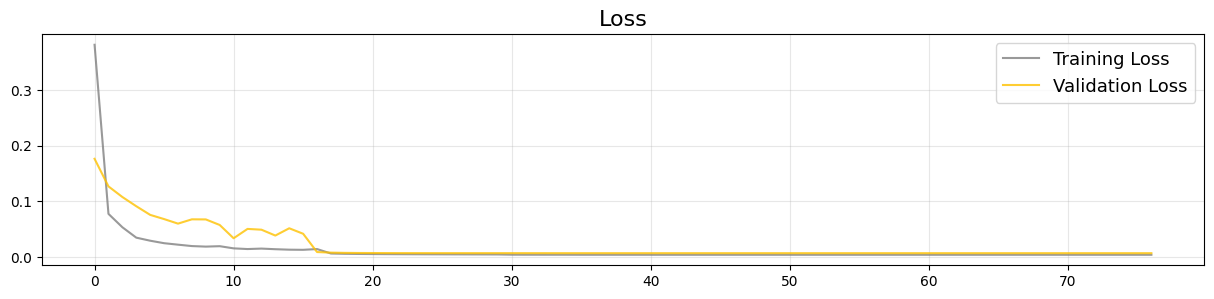

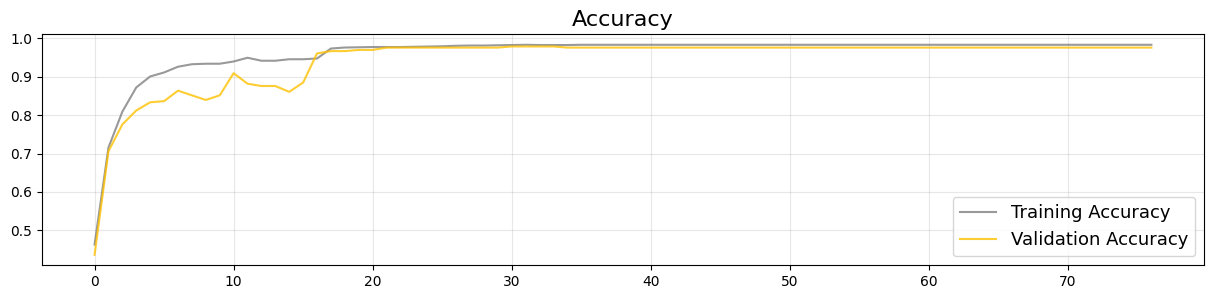

In [25]:
# Create and display plots for training and validation loss
plt.figure(figsize=(15,3))
plt.plot(history['loss'], label='Training Loss', color='grey', alpha=.8)
plt.plot(history['val_loss'], label='Validation Loss', color='#fec100', alpha=.8)
plt.title('Loss', fontsize=16)
plt.legend(fontsize=13)
plt.grid(alpha=.3)

# Create and display plots for training and validation accuracy
plt.figure(figsize=(15,3))
plt.plot(history['accuracy'], label='Training Accuracy',color='grey' , alpha=.8)
plt.plot(history['val_accuracy'], label='Validation Accuracy',color='#fec100', alpha=.8)
plt.title('Accuracy', fontsize=16)
plt.legend(fontsize=13)
plt.grid(alpha=.3)
plt.show()

In [26]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

24/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9799 - loss: 0.0049

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9808 - loss: 0.0047
Accuracy of the model on Training Data is -  98.3116865158081
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9768 - loss: 0.0058 
Accuracy of the model on Testing Data is -  97.57575988769531
